In [93]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import cerberus
import plotly.io as pio


p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

## Box plot for number of samples / libraries for human / mouse there are

In [94]:
human = pd.read_csv('swan/swan_metadata.tsv', sep='\t')
human['species'] = 'Human'

mouse = pd.read_csv('../mouse/lr_bulk/swan/mouse_metadata.tsv', sep='\t')
mouse['species'] = 'Mouse'

keep_cols = ['dataset', 'sample', 'classification', 'species']
human = human[keep_cols]
mouse = mouse[keep_cols]

df = pd.concat([human, mouse], axis=0)

In [95]:
# gb species and classification and count libraries
temp = df.groupby(['classification', 'species']).count().reset_index()
temp = temp[['classification', 'species', 'dataset']]
temp.rename({'dataset': 'n_libraries'}, axis=1, inplace=True)

In [96]:
# gb species and classification and count samples
temp2 = df.groupby(['classification', 'species']).nunique().reset_index()
temp2 = temp2[['classification', 'species', 'sample']]
temp2.rename({'sample': 'n_samples'}, axis=1, inplace=True)

In [97]:
temp = temp.merge(temp2, on=['species', 'classification'])

In [98]:
c_dict, order = get_tissue_cell_line_colors()

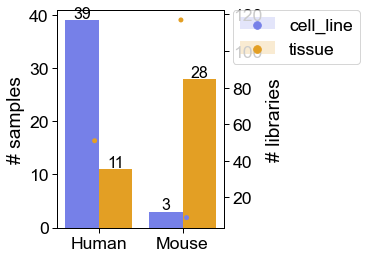

In [132]:
sns.set_context('paper', font_scale=2)
plt.figure(figsize=(3,4))
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

ax = sns.barplot(data=temp2, x='species', y='n_samples',
            hue='classification',
            palette=c_dict, saturation=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xlabel = ''
ylabel = '# samples'

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
_ = ax.set(xlabel=xlabel, ylabel=ylabel)
# ax.set_xticklabels(['vM25', 'Obs.', 'Obs. major'])

def add_perc_2(ax):
    ylim = ax.get_ylim()[1]
    n_cats = len(ax.patches)
    for p in ax.patches:
        label = '{:.0f}'.format(p.get_height())
        # n = p.get_height()
        # label = '{:.0f} samples'.format(temp.loc[temp.n_libraries == n, 'n_samples'].tolist()[0])
        x = p.get_x() + p.get_width() / 2
        # x = p.get_x() + p.get_width() / 2 - 0.3
        # x = p.get_x() + p.get_width() / 2 - (0.015)*n_cats
        y = p.get_y() + p.get_height() + ylim*0.01
        ax.annotate(label, (x, y), size=16, horizontalalignment='center')


add_perc_2(ax)

# # add dots for n libraries on top
ax2 = ax.twinx()
# for p in ax.patches:
#     n = p.get_height()
#     x.append(p.get_x() + p.get_width() / 2)
#     y.append(temp.loc[temp.n_samples == n, 'n_libraries'].tolist()[0])
    
# # get x / y lims for both 
# ymin = 0
# ymax = max(temp.n_libraries+10)
# _ = ax.set(ylim=(ymin, ymax))
# _ = ax2.set(ylim=(ymin, ymax))

# ax2 = sns.stripplot(data=temp, x='species',
#                     y='n_libraries', hue='classification',
#                     ax=ax2, palette=c_dict)

ylabel = '# libraries'
_ = ax2.set(ylabel=ylabel)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


In [121]:
temp

,classification,species,n_libraries,n_samples
0,cell_line,Human,87,39
1,cell_line,Mouse,9,3
2,tissue,Human,51,11
3,tissue,Mouse,117,28


In [100]:
temp

,classification,species,n_libraries,n_samples
0,cell_line,Human,87,39
1,cell_line,Mouse,9,3
2,tissue,Human,51,11
3,tissue,Mouse,117,28
